In [187]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [188]:
path = '/home/akanchha/Desktop/Micro_Masters/UCSanDiegoX-s-Data-Science-MicroMasters/Python_for_Data_Science/week-9/Churn_Modelling.csv'

In [189]:
data = pd.read_csv(path)

In [190]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [191]:
data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [192]:
data.shape

(10000, 14)

In [193]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [135]:
#lets find out if there is any null values in dataset
data.isnull()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [194]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Its good that there is no non values

In [195]:
# Lets copy data to another dataframe to do some manipulation.

data_copy = data.copy()

In [196]:
# deleting some columns that we dont need in this analysis
del data_copy['RowNumber']
del data_copy['CustomerId']
del data_copy['Surname']

In [197]:
# lets find corr between each variable

data_copy['Geography']=data_copy['Geography'].astype('category').cat.codes
data_copy['Gender']=data_copy['Gender'].astype('category').cat.codes
data_copy.corr()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,0.007888,-0.002857,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Geography,0.007888,1.000000,0.004719,0.022812,0.003739,0.069408,0.003972,-0.008523,0.006724,-0.001369,0.035943
Gender,-0.002857,0.004719,1.000000,-0.027544,0.014733,0.012087,-0.021859,0.005766,0.022544,-0.008112,-0.106512
Age,-0.003965,0.022812,-0.027544,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,0.003739,0.014733,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.069408,0.012087,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,0.003972,-0.021859,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.008523,0.005766,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.006724,0.022544,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.001369,-0.008112,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


In [198]:
del data['RowNumber']

In [199]:
del data['Surname']

In [200]:
del data['CustomerId']

In [201]:
# lets calculate the distribution of dependent variable which is "Exited"

(data[data['Exited'] == 1].shape[0] / data.shape[0]) * 100

20.369999999999997

Above code cell result means that around 20 percent of customers have churned. Also it means that distibution of dependent variable is not even/balanced distribution

In [143]:
# lets count number of exited and non exited customer
churn = data['Exited'].value_counts().reset_index()
churn.head()

,Exited,count
0,0,7963
1,1,2037


In [202]:
churn = churn.rename(columns={"Exited":"index"})
churn

,index,count
0,0,7963
1,1,2037


In [203]:
churn = churn.rename(columns={"count":"Exited"})
churn

,index,Exited
0,0,7963
1,1,2037


# VISUALIZATION #

<Axes: xlabel='index', ylabel='Exited'>

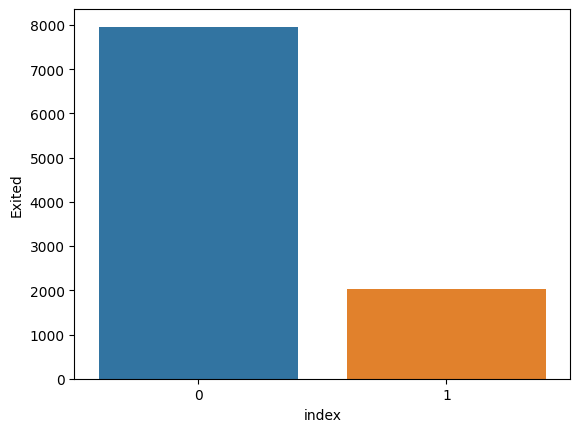

In [206]:
# lets try to visualize the result of previous cell on a bar plot
sns.barplot(x = churn['index'], y = churn['Exited'])

<Axes: xlabel='Tenure', ylabel='Density'>

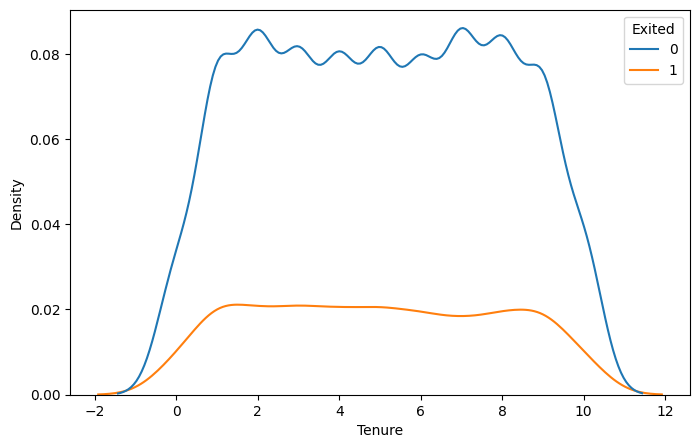

In [207]:
# Lets Visualize the relation between Tenure and Exited column using line grpah

plt.figure(figsize=(8,5))
sns.kdeplot(x=data['Tenure'],hue = data['Exited'])

### Conclusion 1: As we already performed the correlation between variable in initial code cell and found that "Tenure" and "Exited" are negatively correlated means less the tenure more the chances of Exit.So company need to increase tenure time to retain customer ###

In [208]:
# lets find out ow many customer have already exited
churning = data[data['Exited'] == 1]
churning.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
16,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1


In [209]:
churning['Exited'].value_counts()

Exited
1    2037
Name: count, dtype: int64

In [210]:
# lets understand the data distribution of 'Geography' parameter
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [211]:
# below is a calculate ratio function which will be used in upcoming code cell to understand data distribution between variables in ratios.

def calculate_ratios(ax):
  l = len(ax.patches)
  cnt = 0
  without_churn = []
  with_churn = []
  for p in ax.patches:
      if cnt < 1/2:
          without_churn.append(p.get_height())
      else:
          with_churn.append(p.get_height())
      cnt += 1;
      
  print("without_churn:" , without_churn)
  print("with_churn:" , with_churn)

  ratio = []
  for i in range(len(without_churn)):
       ratio.append(with_churn[i]/without_churn[i])
  print("ratio" ,ratio)

(array([0, 1, 2]),
 [Text(0, 0, 'France'), Text(1, 0, 'Spain'), Text(2, 0, 'Germany')])

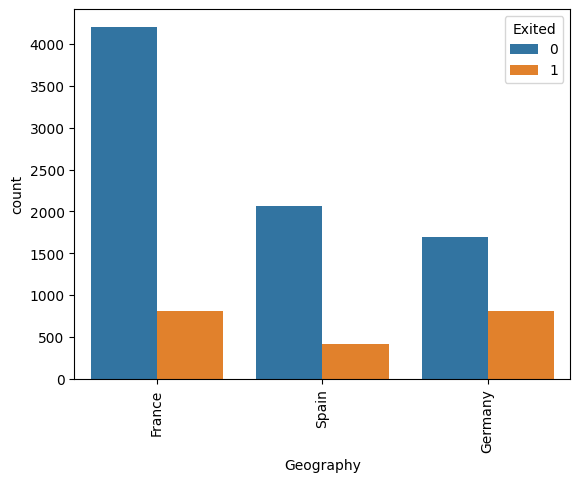

In [212]:
# lets visualize the distribution of dependent variable for 'Geography' parameter. It will give static measures of ratios
ax =  sns.countplot(x = data['Geography'], hue = data['Exited'])
plt.xticks(rotation = 90)    


### Conclusion 2: From above graph the customer from France are less likely to churn and customer from Germany are most likely to churn so bank should focus on undrstanding the cusomer issues in Germany specifically ###

In [213]:
calculate_ratios(ax)

without_churn: [4204.0]
with_churn: [2064.0, 1695.0, 810.0, 413.0, 814.0]
ratio [0.49096098953377737]


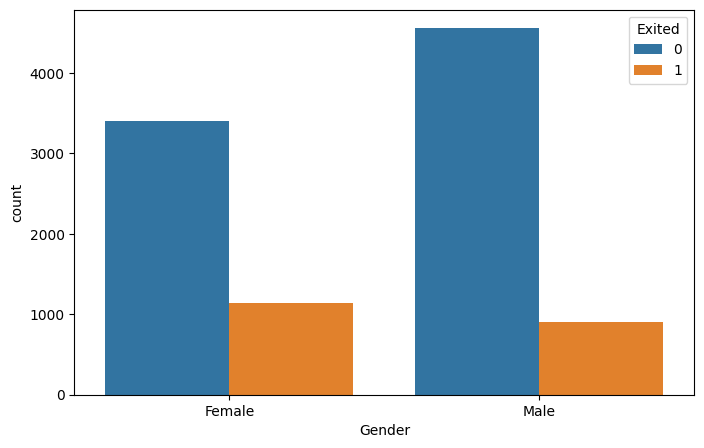

In [214]:
# Lets understand another parameter 'Gender' 
plt.figure(figsize = (8,5))
g =  sns.countplot(x = data['Gender'], hue = data['Exited'])

In [215]:
calculate_ratios(g)

without_churn: [3404.0]
with_churn: [4559.0, 1139.0, 898.0]
ratio [1.3393066980023502]


In [216]:
(churning[churning['Gender'] == 'Female'].shape[0]/data[data['Gender'] == 'Female'].shape[0])*100

25.071538630860662

In [217]:
(churning[churning['Gender'] == 'Male'].shape[0]/data[data['Gender'] == 'Male'].shape[0])*100

16.455928165658786

In [218]:
churning

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
16,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1
...,...,...,...,...,...,...,...,...,...,...,...
9981,498,Germany,Male,42,3,152039.70,1,1,1,53445.17,1
9982,655,Germany,Female,46,7,137145.12,1,1,0,115146.40,1
9991,597,France,Female,53,4,88381.21,1,1,0,69384.71,1
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1


### Conclusion 3: Gender has impact on churn. Female are most likely to churn. ###

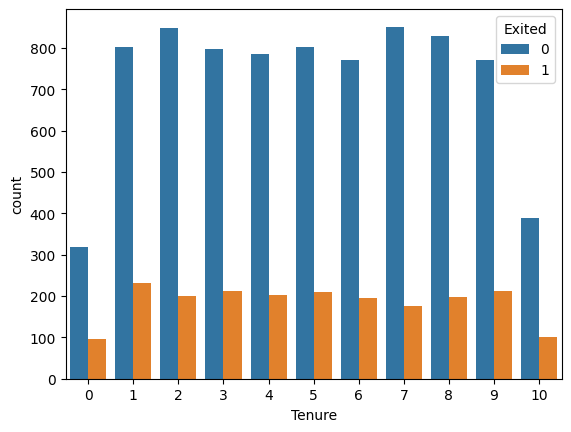

In [219]:
# earlier we see distribution of tenure using linegraph. here lets visualize using countplot
dev =  sns.countplot(x = data['Tenure'], hue = data['Exited'])

Above distribution shows the customer have churned already within one year and most likely to not churn if retained for longer year


In [220]:
calculate_ratios(dev)

without_churn: [318.0]
with_churn: [803.0, 847.0, 796.0, 786.0, 803.0, 771.0, 851.0, 828.0, 771.0, 389.0, 95.0, 232.0, 201.0, 213.0, 203.0, 209.0, 196.0, 177.0, 197.0, 213.0, 101.0]
ratio [2.5251572327044025]


In [221]:
# exploring another parameter "HasCrCard"
has_card = churning['HasCrCard'].value_counts().reset_index()
has_card.head()

,HasCrCard,count
0,1,1424
1,0,613


In [222]:
has_card = has_card.rename(columns={"HasCrCard":"index"})
has_card

,index,count
0,1,1424
1,0,613


In [223]:
has_card = has_card.rename(columns={"count":"HasCrCard"})
has_card

,index,HasCrCard
0,1,1424
1,0,613


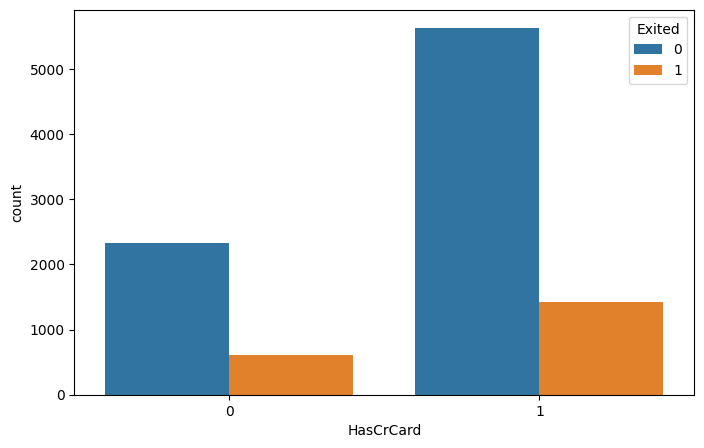

In [224]:
plt.figure(figsize = (8,5))
h =  sns.countplot(x = data['HasCrCard'], hue = data['Exited'])

In [225]:
calculate_ratios(h)

without_churn: [2332.0]
with_churn: [5631.0, 613.0, 1424.0]
ratio [2.4146655231560894]


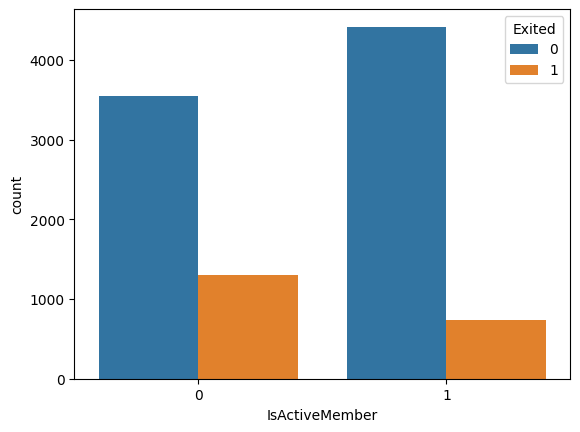

In [226]:
# lets understand the relation between customer who are active member and exited
has_card = sns.countplot(x = data['IsActiveMember'], hue = data['Exited'])

In [227]:
calculate_ratios(has_card)

without_churn: [3547.0]
with_churn: [4416.0, 1302.0, 735.0]
ratio [1.2449957710741473]


### Conclusion 4: the customer who are more active are less likely to churn which means companies need to take measure that create more engagement for customer to retain them for example giving more offers

In [228]:
# lets check if having more number of products has imapact on exit

data['NumOfProducts'].unique()

array([1, 3, 2, 4])

(array([0, 1, 2, 3]),
 [Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3'), Text(3, 0, '4')])

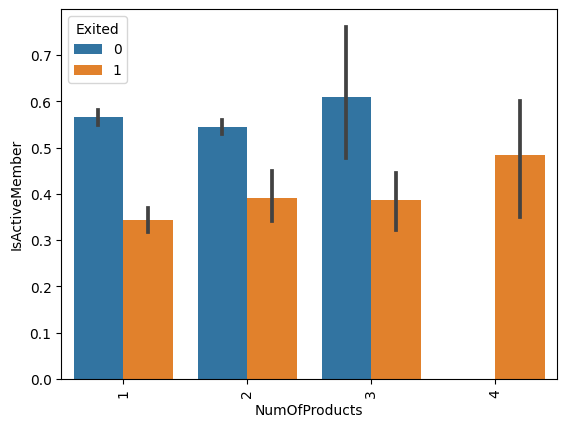

In [229]:
productPref = sns.barplot(x = data['NumOfProducts'] , y = data['IsActiveMember'] , hue =data['Exited'])
plt.xticks(rotation = 90)        

In [230]:
calculate_ratios(productPref)

without_churn: [0.5654421768707483]
with_churn: [0.5445544554455446, 0.6086956521739131, nan, 0.34421575585521647, 0.39080459770114945, 0.38636363636363635, 0.48333333333333334]
ratio [0.9630594917047047]


<Axes: xlabel='NumOfProducts', ylabel='IsActiveMember'>

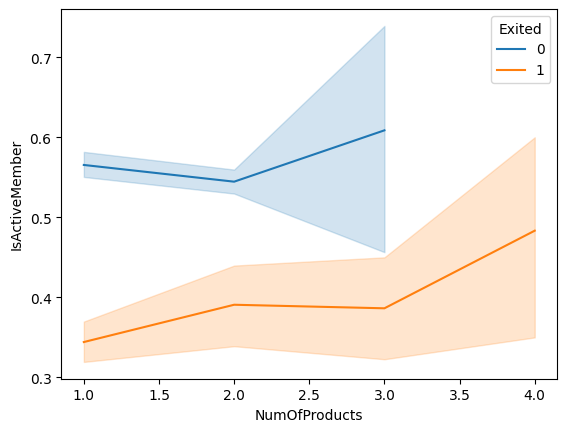

In [231]:
sns.lineplot(x = data['NumOfProducts'] , y = data['IsActiveMember'] , hue =data['Exited'])

### Conclusion 5: customer with more number of products are more likely to be more active hence less likely to churn . This also shows the independent variables also shows some relation among each other. This relation can be used in naive bayes as conditional for machine learning inference ###

<Axes: xlabel='CreditScore', ylabel='Count'>

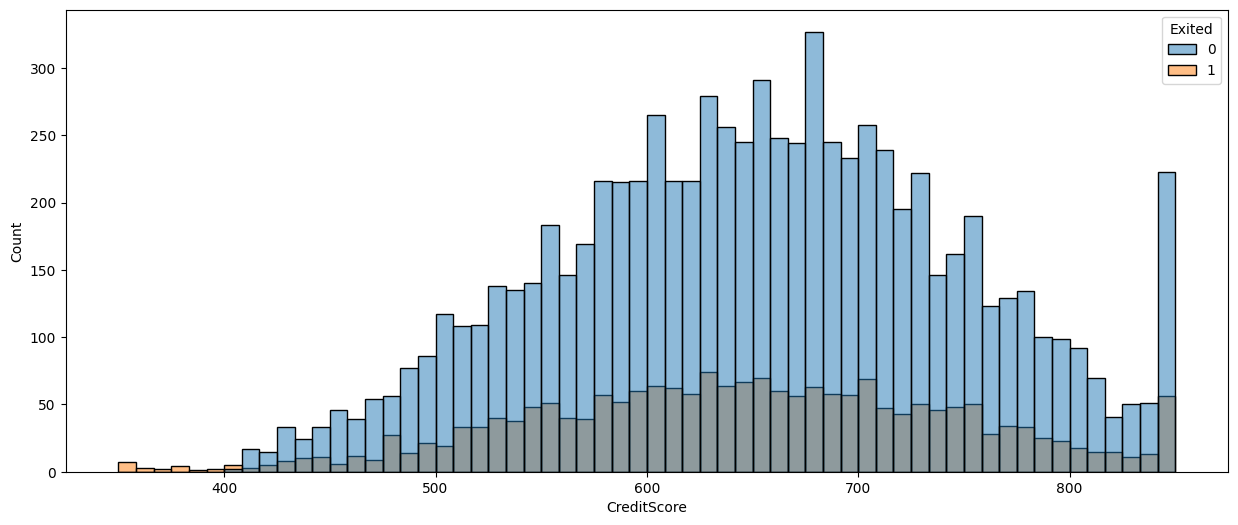

In [232]:
# lets understand how credit score features imapact the target variable 'exited' through binning

plt.figure(figsize = (15,6))
sns.histplot(x = data['CreditScore'] , hue = data['Exited'] , bins = 60)

### Conclusion 6: the customer with more credit score are less likely to churn ###

In [233]:
# lets count the number of customer in each country

country = data['Geography'].value_counts().reset_index()
country

,Geography,count
0,France,5014
1,Germany,2509
2,Spain,2477


In [234]:
country = country.rename(columns={"Geography":"index" , "count":"Geography"})
country

,index,Geography
0,France,5014
1,Germany,2509
2,Spain,2477


<Axes: xlabel='Geography', ylabel='index'>

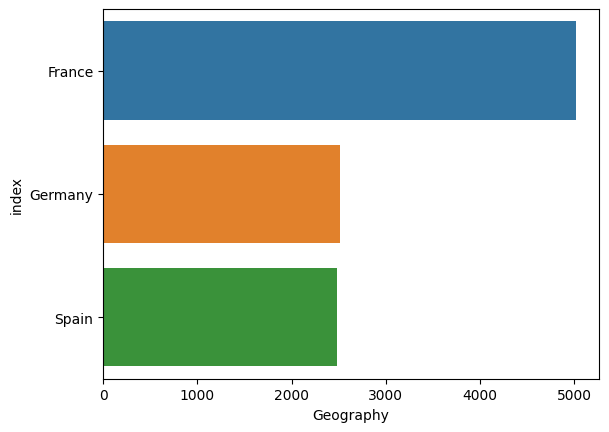

In [235]:
sns.barplot(x = country['Geography'], y = country['index'])

### Conclusion 7 : the most regular customer are from France are less likely to churn and customer who are from germany are more likely to churn

In [236]:
data['Geography']=data['Geography'].astype('category').cat.codes

data.groupby(['Gender']).aggregate(np.mean)['IsActiveMember']

Gender
Female    0.502751
Male      0.525380
Name: IsActiveMember, dtype: float64

<Axes: xlabel='Gender', ylabel='IsActiveMember'>

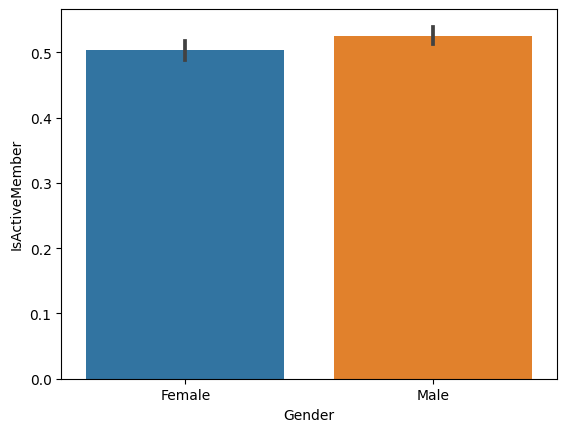

In [237]:
sns.barplot(x = data['Gender'], y = data['IsActiveMember'])

### Conclusion 8 : Female Male both  are less or more equally active member

<Axes: xlabel='Age', ylabel='Count'>

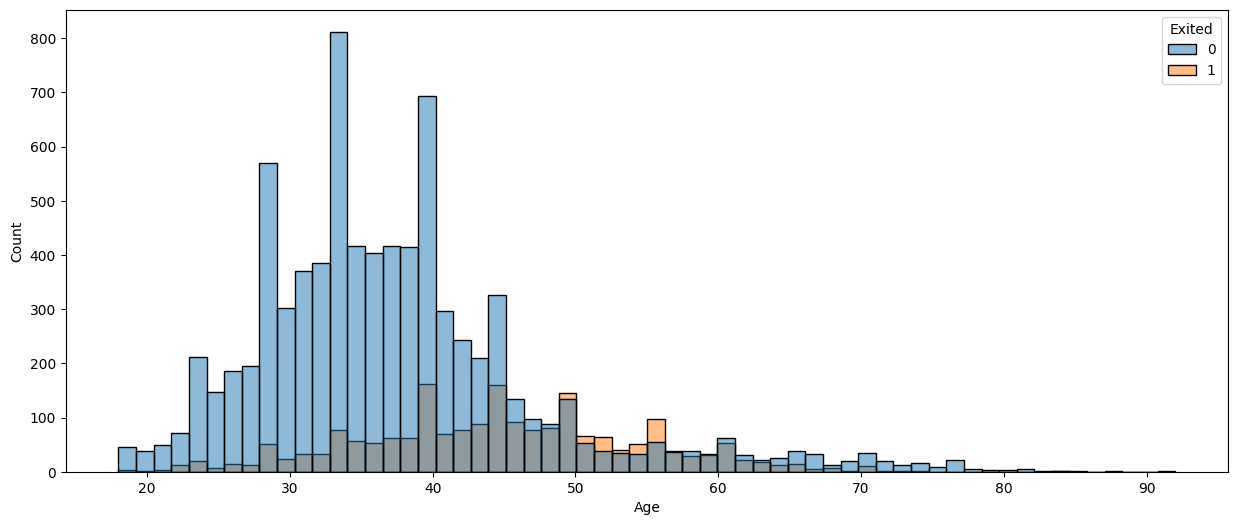

In [240]:
plt.figure(figsize = (15,6))
sns.histplot(x = data['Age'] , hue = data['Exited'] , bins = 60)

### Conclusion 9 Customer above the age of 40 to 50 are more likely to churn.